In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"D:\data analyst\datasets\advertising.csv")

# 1. Exploring data

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# 2.Data Visualization

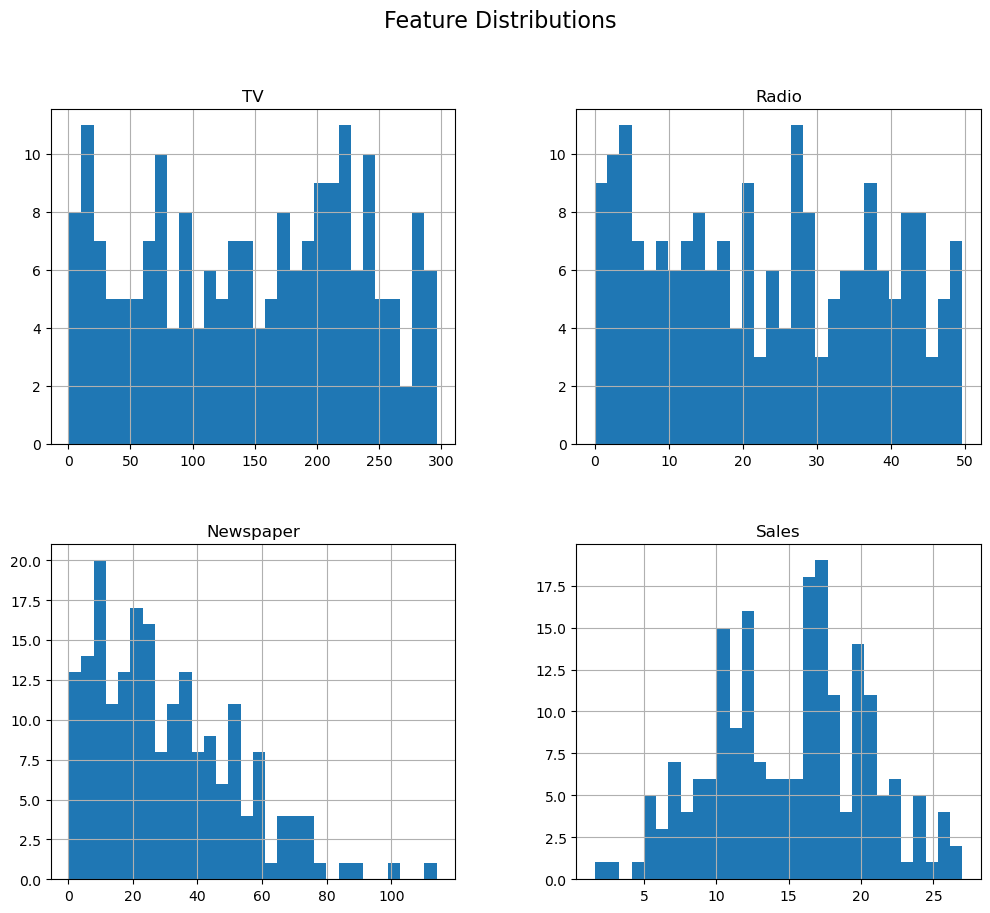

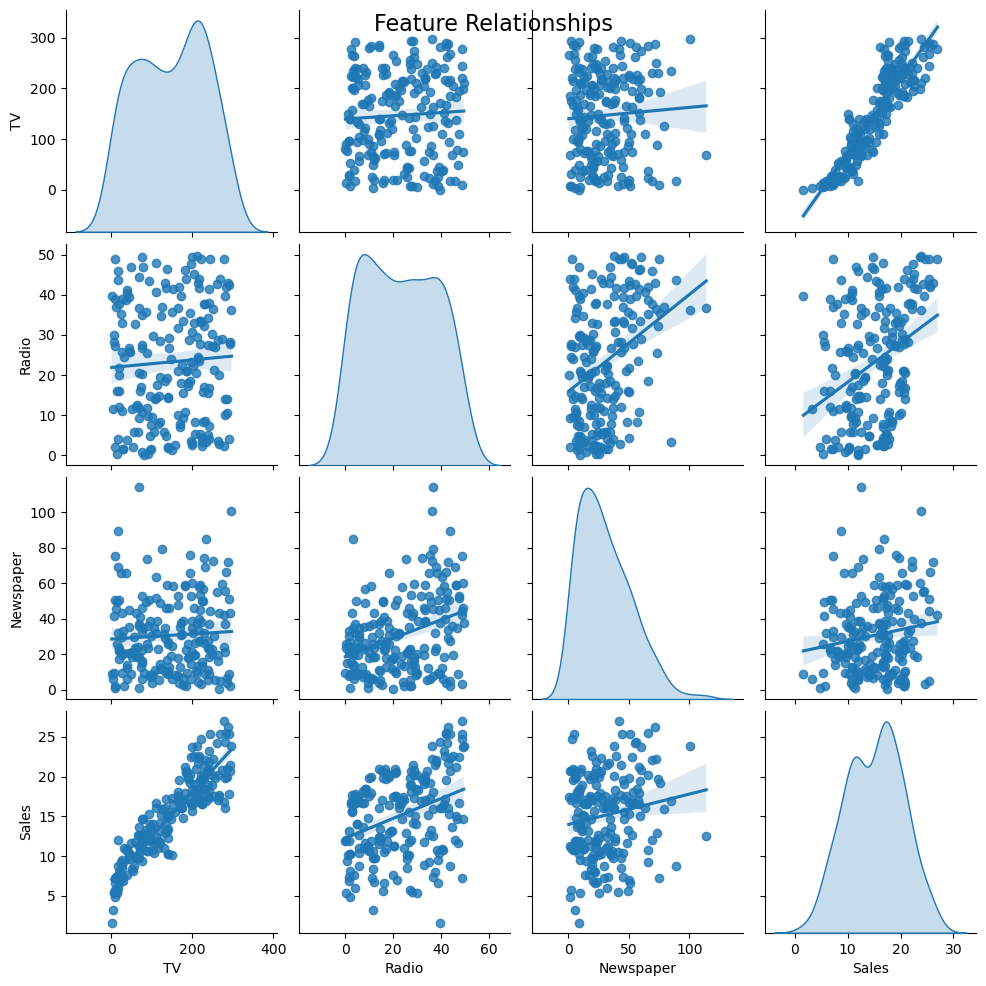

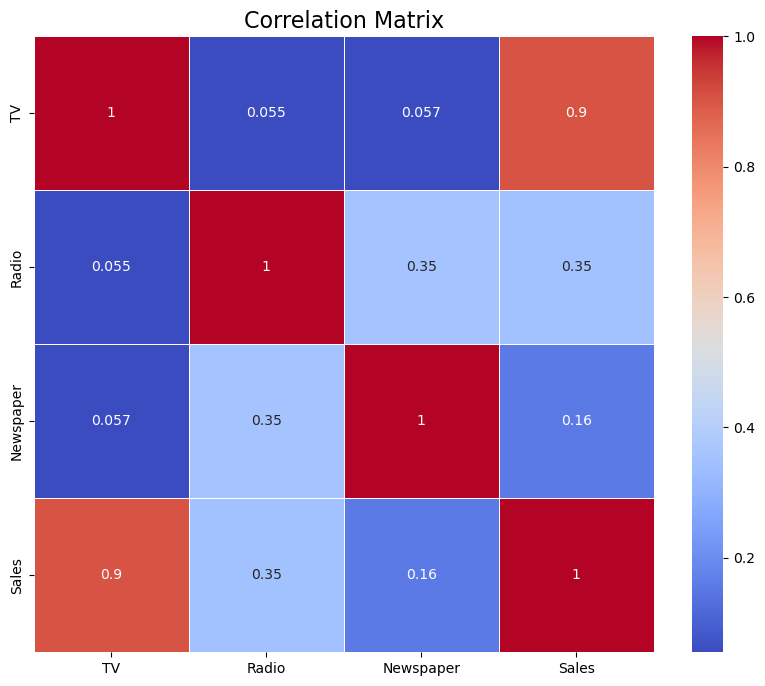

In [8]:
data.hist(bins=30, figsize=(12, 10))
plt.suptitle('Feature Distributions', size=16)
plt.show()

sns.pairplot(data, diag_kind='kde', kind='reg')
plt.suptitle('Feature Relationships', size=16)
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', size=16)
plt.show()


In [16]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Insight

> TV and Sales: The correlation between TV advertising spend and Sales is 0.901208, which is very close to 1. This means there's a strong positive relationship—higher spending on TV ads is strongly associated with higher sales.

> Radio and Sales: The correlation between Radio advertising spend and Sales is 0.349631. This is a moderate positive relationship, meaning that spending more on radio ads is somewhat associated with higher sales, but the relationship isn't as strong as with TV ads.

>Newspaper and Sales: The correlation between Newspaper advertising spend and Sales is 0.157960, which indicates a weak positive relationship. Spending more on newspaper ads has a very small association with increased sales.

Spending on different types of ads (TV, Radio, Newspaper) is largely independent of each other.

# 3.Data Preparation

In [9]:
from sklearn.model_selection import train_test_split

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (160, 3) (160,)
Testing set shape (X_test, y_test): (40, 3) (40,)


# 4. Model Selection and Training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [11]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred=model.predict(X_test)

In [13]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [14]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
R-squared (R²): 0.91


Coefficients:
            Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


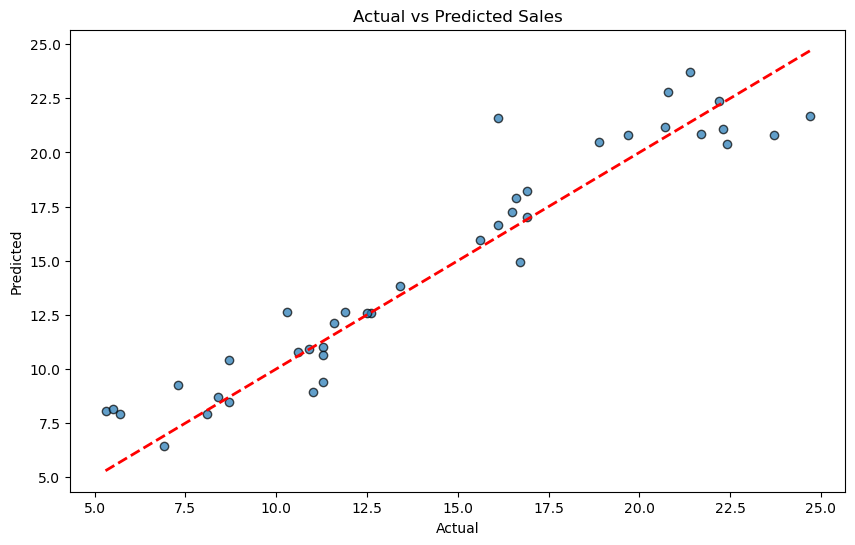

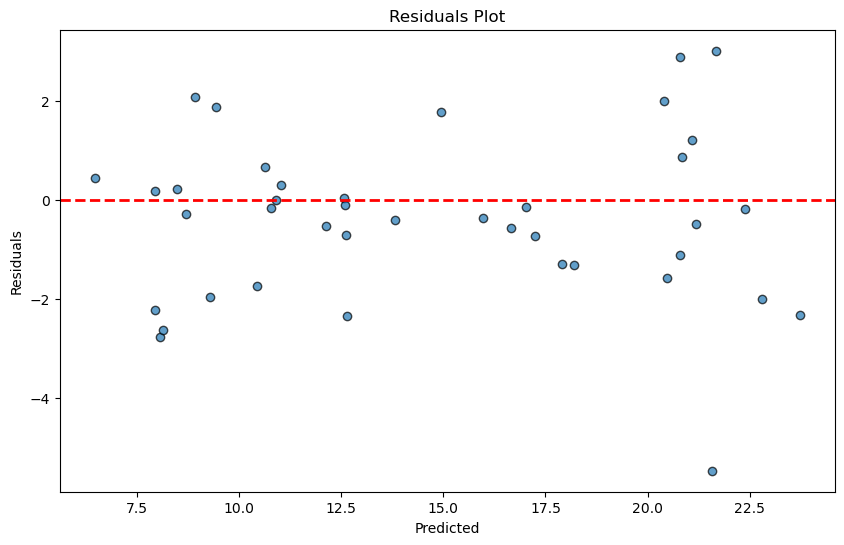

In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:\n", coefficients)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


# Coefficients

TV: A 1 unit increase in TV advertising spend is associated with an average increase of approximately 0.0545 units in Sales, holding other factors constant

Radio: A 1 unit increase in Radio advertising spend is associated with an average increase of approximately 0.1009 units in Sales, holding other factors constant

Newspaper: A 1 unit increase in Newspaper advertising spend is associated with an average increase of approximately 0.0043 units in Sales, holding other factors constant



This indicates that Radio advertising has the highest impact on sales, followed by TV and then Newspaper.